In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, plot_roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator,TransformerMixin
from imblearn.pipeline import make_pipeline

Explore data

In [8]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sub_df = pd.read_csv("sample_submission.csv")

In [3]:
train_df.head(100)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,3299,75,6,279,151,4300,226,233,163,...,0,0,0,0,0,0,0,0,0,1
96,96,3232,32,8,197,4,4008,226,231,105,...,0,0,0,0,0,0,0,0,0,1
97,97,2958,159,15,265,10,4699,224,235,99,...,0,0,0,0,0,0,0,0,0,2
98,98,2975,327,2,293,25,7039,226,232,156,...,0,0,0,0,0,0,0,0,0,2


In [4]:
train_df.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3999995,3999995,2954,34,25,51,65,6314,240,237,103,...,0,0,0,0,0,0,0,0,0,2
3999996,3999996,2926,104,8,696,83,5427,210,216,150,...,0,0,0,0,0,0,0,0,0,2
3999997,3999997,2911,144,1,509,58,4820,195,192,91,...,0,0,0,0,0,0,0,1,0,2
3999998,3999998,2580,178,17,376,86,2592,225,183,39,...,0,0,0,0,0,0,0,0,0,3
3999999,3999999,3083,136,4,44,9,1675,213,197,205,...,0,0,0,0,0,0,0,0,0,1


In [5]:
train_df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [6]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,4000000.0,2.000000e+06,1.154701e+06,0.0,999999.75,1999999.5,2999999.25,3999999.0
Elevation,4000000.0,2.980192e+03,2.890482e+02,1773.0,2760.00,2966.0,3217.00,4383.0
Aspect,4000000.0,1.515857e+02,1.099611e+02,-33.0,60.00,123.0,247.00,407.0
Slope,4000000.0,1.509754e+01,8.546731e+00,-3.0,9.00,14.0,20.00,64.0
Horizontal_Distance_To_Hydrology,4000000.0,2.713154e+02,2.265497e+02,-92.0,110.00,213.0,361.00,1602.0
Vertical_Distance_To_Hydrology,4000000.0,5.166262e+01,6.821597e+01,-317.0,4.00,31.0,78.00,647.0
Horizontal_Distance_To_Roadways,4000000.0,1.766642e+03,1.315610e+03,-287.0,822.00,1436.0,2365.00,7666.0
Hillshade_9am,4000000.0,2.118375e+02,3.075996e+01,-4.0,198.00,218.0,233.00,301.0
Hillshade_Noon,4000000.0,2.210614e+02,2.223134e+01,49.0,210.00,224.0,237.00,279.0
Hillshade_3pm,4000000.0,1.408109e+02,4.369864e+01,-53.0,115.00,142.0,169.00,272.0


In [7]:
train_df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [8]:
test_df.head(100)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,4000000,2763,78,20,377,88,3104,218,213,195,...,0,0,0,0,0,0,0,0,0,0
1,4000001,2826,153,11,264,39,295,219,238,148,...,0,0,0,0,0,0,0,0,0,0
2,4000002,2948,57,19,56,44,852,202,217,163,...,0,0,1,0,0,0,0,0,0,0
3,4000003,2926,119,6,158,134,2136,234,240,142,...,0,0,0,0,0,0,0,0,0,0
4,4000004,2690,10,4,38,108,3589,213,221,229,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4000095,2682,6,32,106,103,1480,229,248,172,...,0,0,0,0,0,0,0,0,0,0
96,4000096,3566,102,7,419,36,676,245,204,102,...,0,0,0,0,0,0,0,0,0,0
97,4000097,2199,70,13,68,60,864,238,195,117,...,0,0,0,0,0,0,0,0,0,0
98,4000098,3378,26,15,112,30,2198,230,203,143,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_df.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
999995,4999995,2974,254,15,146,100,623,222,245,117,...,0,0,0,0,0,0,0,0,0,0
999996,4999996,3180,92,16,93,47,3740,209,201,142,...,0,0,0,0,0,0,0,0,1,0
999997,4999997,2684,51,20,34,123,962,199,225,145,...,0,0,0,0,1,0,0,0,0,0
999998,4999998,3309,64,12,196,93,2522,226,193,74,...,0,0,0,0,0,0,0,0,0,0
999999,4999999,2543,322,7,162,147,2643,223,222,82,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [11]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1000000.0,4.500000e+06,288675.278933,4000000.0,4249999.75,4499999.5,4749999.25,4999999.0
Elevation,1000000.0,2.969602e+03,342.676046,1782.0,2725.00,2968.0,3245.00,4359.0
Aspect,1000000.0,1.522316e+02,111.629725,-33.0,59.00,124.0,251.00,400.0
Slope,1000000.0,1.492346e+01,8.457005,-3.0,9.00,14.0,20.00,63.0
Horizontal_Distance_To_Hydrology,1000000.0,2.643681e+02,227.971753,-136.0,102.00,206.0,356.00,1583.0
Vertical_Distance_To_Hydrology,1000000.0,5.148036e+01,68.520188,-329.0,3.00,31.0,78.00,634.0
Horizontal_Distance_To_Roadways,1000000.0,1.713508e+03,1374.922218,-264.0,751.00,1320.0,2261.00,7653.0
Hillshade_9am,1000000.0,2.116597e+02,31.280435,1.0,197.00,218.0,234.00,296.0
Hillshade_Noon,1000000.0,2.214762e+02,21.951950,53.0,210.00,224.0,237.00,276.0
Hillshade_3pm,1000000.0,1.398615e+02,45.398002,-51.0,114.00,142.0,169.00,270.0


In [12]:
cover_type_count = train_df.Cover_Type.value_counts()
print(cover_type_count)

2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
5          1
Name: Cover_Type, dtype: int64


Note that:

there are no missing values (count is the same for all) there are columns where all values are zero -> to remove Cover_Type=5 occurs only one time: we have better to remove this sample

In [13]:
sub_df

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2
...,...,...
999995,4999995,2
999996,4999996,2
999997,4999997,2
999998,4999998,2


Visualization

(array([1.468136e+06, 2.262087e+06, 0.000000e+00, 1.957120e+05,
        0.000000e+00, 3.770000e+02, 1.000000e+00, 0.000000e+00,
        1.142600e+04, 6.226100e+04]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

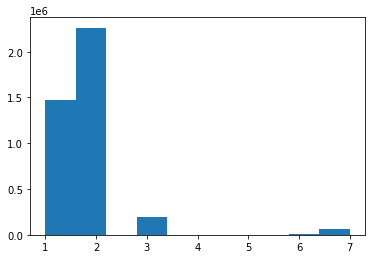

In [14]:
plt.hist(train_df['Cover_Type'])

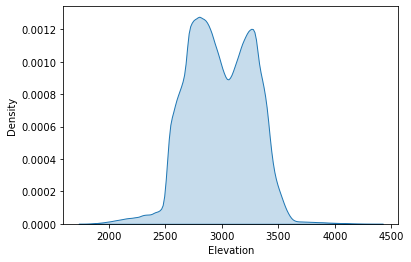

In [15]:
sns.kdeplot(x = train_df['Elevation'], fill=True)
plt.show()

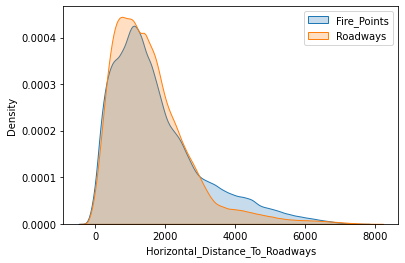

In [17]:
sns.kdeplot(x = train_df['Horizontal_Distance_To_Roadways'], fill = True)
sns.kdeplot(x = train_df['Horizontal_Distance_To_Fire_Points'], fill = True)
plt.legend(labels = ["Fire_Points","Roadways"])
plt.show()

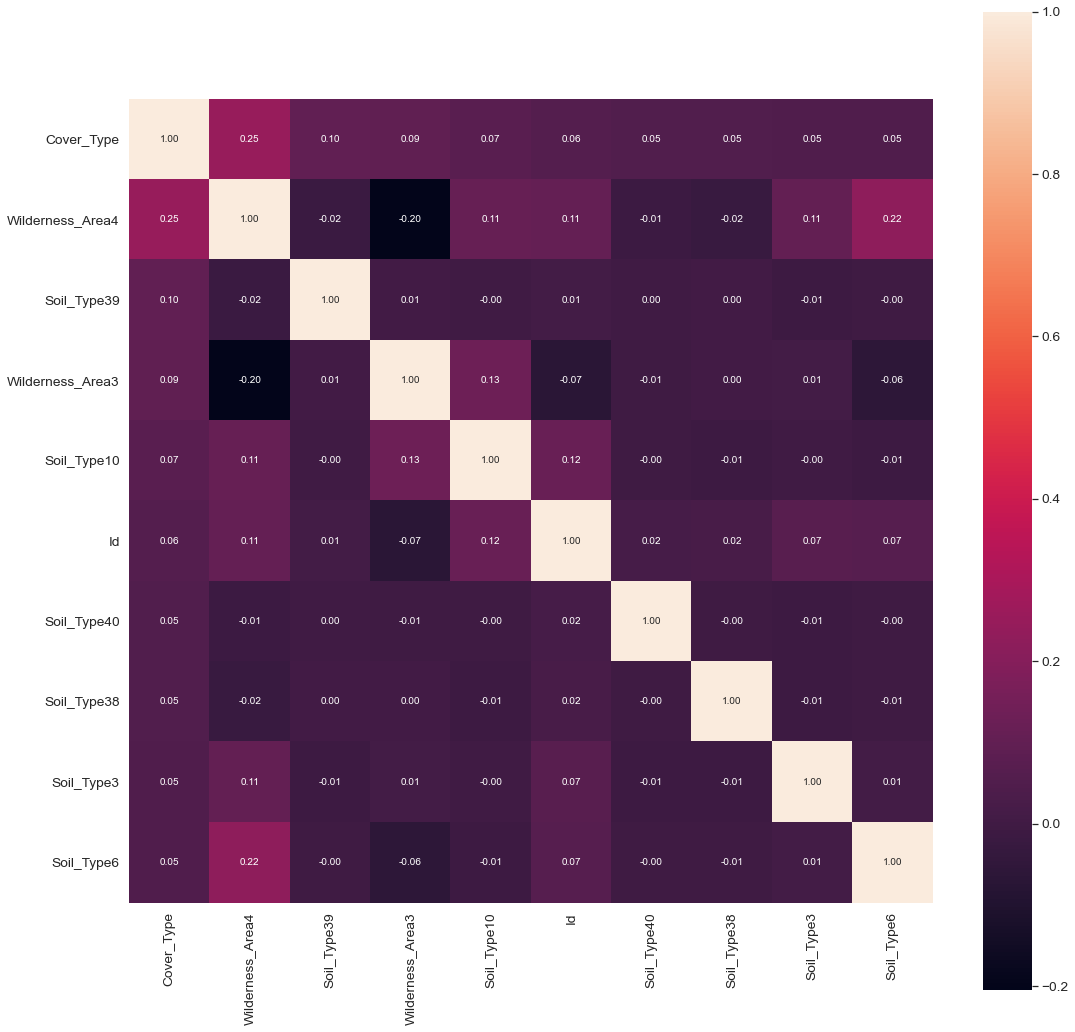

In [18]:
corr=train_df.corr()
v=10
colmn = corr.nlargest(v, 'Cover_Type')['Cover_Type'].index 
xm = np.corrcoef(train_df[colmn].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(18, 18))
hm = sns.heatmap(xm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},yticklabels=colmn.values, xticklabels=colmn.values)
plt.show()

In [19]:
x_train = train_df.drop(['Cover_Type'], axis=1)
y_train = train_df['Cover_Type']

In [ ]:
#horizontal distance
sns.kdeplot(x = train_df['Horizontal_Distance_To_Hydrology'])
sns.kdeplot(x = train_df['Horizontal_Distance_To_Roadways'])
sns.kdeplot(x = train_df['Horizontal_Distance_To_Fire_Points'])
plt.legend(labels = ["To Hydrology","To Roadways", "To Fire Points"])
plt.title('HORIZONTAL DISTANCE')
plt.show()

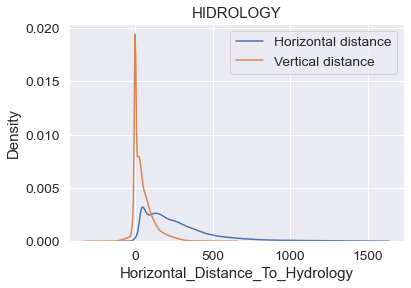

In [22]:
#hidrology
sns.kdeplot(x = train_df['Horizontal_Distance_To_Hydrology'])
sns.kdeplot(x = train_df['Vertical_Distance_To_Hydrology'])
plt.legend(labels = ["Horizontal distance","Vertical distance"])
plt.title('HIDROLOGY')
plt.show()

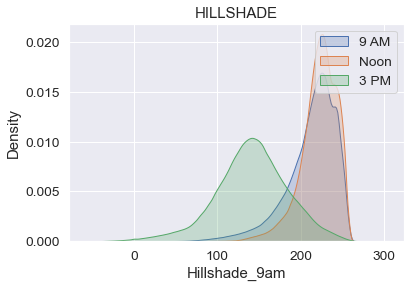

In [23]:
#hillshade
sns.kdeplot(x = train_df['Hillshade_9am'], fill = True)
sns.kdeplot(x = train_df['Hillshade_Noon'], fill = True)
sns.kdeplot(x = train_df['Hillshade_3pm'], fill = True)
plt.legend(labels = ["9 AM", "Noon", "3 PM"])
plt.title('HILLSHADE')
plt.show()

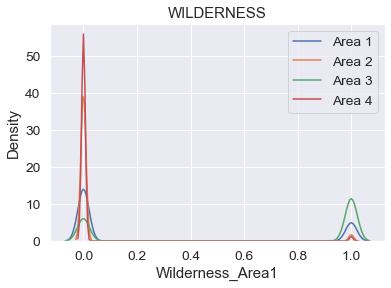

In [24]:
#Wilderness
sns.kdeplot(x = train_df['Wilderness_Area1'])
sns.kdeplot(x = train_df['Wilderness_Area2'])
sns.kdeplot(x = train_df['Wilderness_Area3'])
sns.kdeplot(x = train_df['Wilderness_Area4'])
plt.legend(labels = ["Area 1", "Area 2", "Area 3", "Area 4"])
plt.title('WILDERNESS')
plt.show()

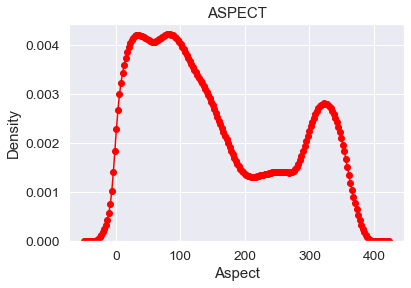

In [25]:
#Aspect
sns.kdeplot(x = train_df['Aspect'], color = 'red', marker = "o")
plt.title('ASPECT')
plt.show()

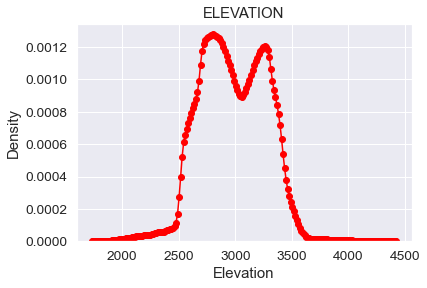

In [26]:
#Elevation
sns.kdeplot(x = train_df['Elevation'], color = 'red', marker = "o")
plt.title('ELEVATION')
plt.show()

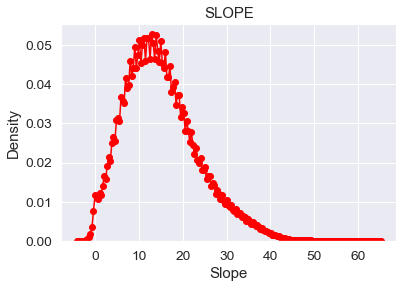

In [27]:
#Slope
sns.kdeplot(x = train_df['Slope'], color = "red", marker = "o")
plt.title('SLOPE')
plt.show()

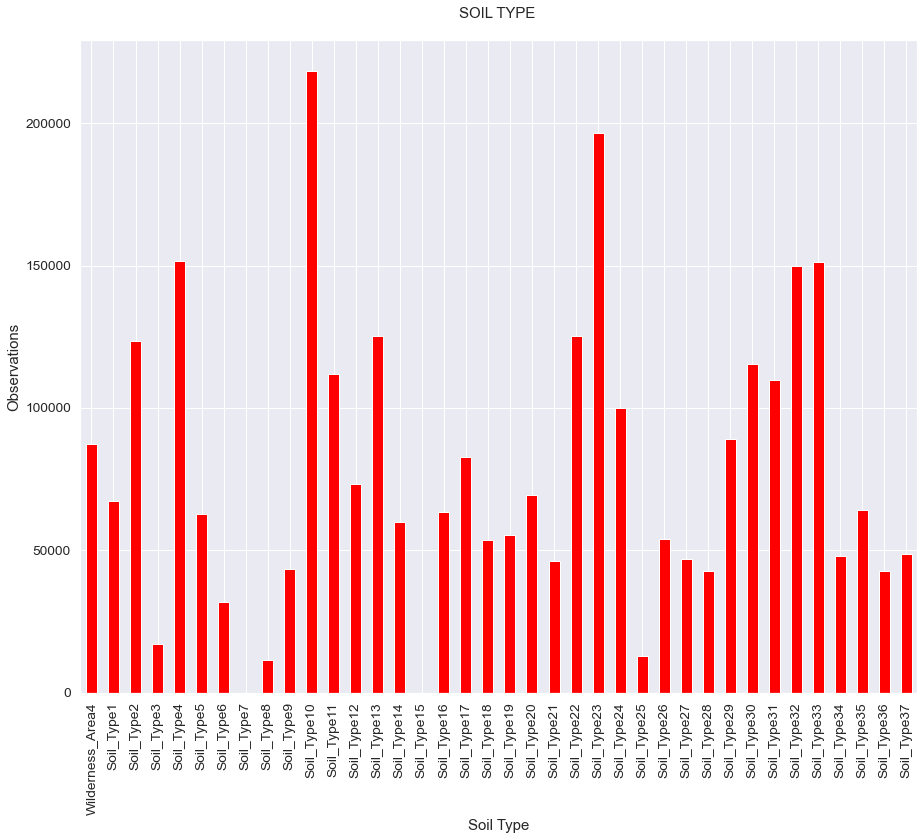

In [28]:
#soil type
soil_type = train_df.iloc[:,14:52]
soil_type.sum().plot(kind='bar', figsize=(15,12), color = 'red')
plt.title('SOIL TYPE \n')
plt.xlabel('Soil Type')
plt.ylabel('Observations')
plt.show()

Pre-process data

In [9]:
df = train_df.sample(100000)

In [10]:
#defining the target variable and features
y_train = df['Cover_Type']
x_train = df.drop(['Id', 'Cover_Type'], axis = 1)

In [11]:
#parameter grid for DecisionTreeClassifier
p_grid_dt = [{"decisiontreeclassifier__criterion": ['gini','entropy'],"decisiontreeclassifier__splitter": ['random', 'best']}]

In [12]:
#inner & outer cross-validation
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)
outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=40)

In [13]:
class ManhattanDistance(BaseEstimator,TransformerMixin):

    def __init__(self, column):
        self.column = column


    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        df[self.column] =[abs(x) for x in df[self.column]]

        return df

In [14]:
#pipeline
pipe = make_pipeline(
    ManhattanDistance(column='Horizontal_Distance_To_Hydrology'),
    ManhattanDistance(column='Vertical_Distance_To_Hydrology'),
    ManhattanDistance(column='Horizontal_Distance_To_Roadways'),
    ManhattanDistance(column='Horizontal_Distance_To_Fire_Points'),
    StandardScaler(), 
    PCA(n_components = 10),
    DecisionTreeClassifier() 
)

In [15]:
#introducing the hyperparameter
gspipe = GridSearchCV(estimator=pipe, param_grid=p_grid_dt, cv=inner_cv) 

In [16]:
#computing the cv score
gspipe_cvscore = cross_val_score(gspipe, X=x_train, y=y_train, cv=outer_cv)
gspipe_cvscore

array([0.77892, 0.7612 , 0.77916, 0.75152])

In [17]:
#computing the mean of the cv score
gspipe_cv_score_mean = round(gspipe_cvscore.mean(), 3) 
gspipe_cv_score_mean

0.768

In [18]:
#model in production
gspipe.fit(x_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             estimator=Pipeline(steps=[('manhattandistance-1',
                                        ManhattanDistance(column='Horizontal_Distance_To_Hydrology')),
                                       ('manhattandistance-2',
                                        ManhattanDistance(column='Vertical_Distance_To_Hydrology')),
                                       ('manhattandistance-3',
                                        ManhattanDistance(column='Horizontal_Distance_To_Roadways')),
                                       ('manhattandistance-4',
                                        ManhattanDistance(column='Horizontal_Distance_To_Fire_Points')),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=10)),
                                       ('decisiontreeclassifier',
                                        Decision

In [20]:
#importing the test dataset
test_df = pd.read_csv("test.csv")

In [22]:
#prediction
x_test = test_df.drop(['Id'], axis = 1)
predictions = gspipe.predict(x_test)
predictions

array([2, 2, 2, ..., 2, 1, 2], dtype=int64)

In [24]:
#creating the submission df 
kaggle_submission = pd.DataFrame(predictions, index=test_df["Id"], columns=["Cover_Type"])
kaggle_submission['Cover_Type'].value_counts()

2    533631
1    372927
3     73829
7     11915
6      7441
4       257
Name: Cover_Type, dtype: int64

In [25]:
kaggle_submission

,Cover_Type
Id,
4000000,2
4000001,2
4000002,2
4000003,2
4000004,2
...,...
4999995,2
4999996,2
4999997,2


In [26]:
#exporting as a csv file
kaggle_submission.to_csv("kaggle_submission.csv")